# CALIDAD DE DATOS Y CREACION DATAMART ANALITICO

## SET UP

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
%config IPCompleter.greedy = True

## CARGA DE DATOS

Este caso se compone de 4 ficheros:

* Planta 1, datos de generación
* Planta 1, datos de sensor ambiental
* Planta 2, datos de generación
* Planta 2, datos de sensor ambiental

### Carga de datos planta 1 - datos de generación

In [2]:
p1g = pd.read_csv('../Datos/Plant_1_Generation_Data.csv')
p1g

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,15-05-2020 00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.000,6259559.0
1,15-05-2020 00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.000,6183645.0
2,15-05-2020 00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.000,6987759.0
3,15-05-2020 00:00,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.000,7602960.0
4,15-05-2020 00:00,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.000,7158964.0
...,...,...,...,...,...,...,...
68773,17-06-2020 23:45,4135001,uHbuxQJl8lW7ozc,0.0,0.0,5967.000,7287002.0
68774,17-06-2020 23:45,4135001,wCURE6d3bPkepu2,0.0,0.0,5147.625,7028601.0
68775,17-06-2020 23:45,4135001,z9Y9gH1T5YWrNuG,0.0,0.0,5819.000,7251204.0
68776,17-06-2020 23:45,4135001,zBIq5rxdHJRwDNY,0.0,0.0,5817.000,6583369.0


### Carga de datos planta 2 - datos de generación

In [3]:
p2g = pd.read_csv('../Datos/Plant_2_Generation_Data.csv')
p2g

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,2020-05-15 00:00:00,4136001,4UPUqMRk7TRMgml,0.0,0.0,9425.000000,2.429011e+06
1,2020-05-15 00:00:00,4136001,81aHJ1q11NBPMrL,0.0,0.0,0.000000,1.215279e+09
2,2020-05-15 00:00:00,4136001,9kRcWv60rDACzjR,0.0,0.0,3075.333333,2.247720e+09
3,2020-05-15 00:00:00,4136001,Et9kgGMDl729KT4,0.0,0.0,269.933333,1.704250e+06
4,2020-05-15 00:00:00,4136001,IQ2d7wF4YD8zU1Q,0.0,0.0,3177.000000,1.994153e+07
...,...,...,...,...,...,...,...
67693,2020-06-17 23:45:00,4136001,q49J1IKaHRwDQnt,0.0,0.0,4157.000000,5.207580e+05
67694,2020-06-17 23:45:00,4136001,rrq4fwE8jgrTyWY,0.0,0.0,3931.000000,1.211314e+08
67695,2020-06-17 23:45:00,4136001,vOuJvMaM2sgwLmb,0.0,0.0,4322.000000,2.427691e+06
67696,2020-06-17 23:45:00,4136001,xMbIugepa2P7lBB,0.0,0.0,4218.000000,1.068964e+08


### Carga de datos planta 1 - datos de sensor ambiental

In [4]:
p1w = pd.read_csv('../Datos/Plant_1_Weather_Sensor_Data.csv')
p1w

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
1,2020-05-15 00:15:00,4135001,HmiyD2TTLFNqkNe,25.084589,22.761668,0.0
2,2020-05-15 00:30:00,4135001,HmiyD2TTLFNqkNe,24.935753,22.592306,0.0
3,2020-05-15 00:45:00,4135001,HmiyD2TTLFNqkNe,24.846130,22.360852,0.0
4,2020-05-15 01:00:00,4135001,HmiyD2TTLFNqkNe,24.621525,22.165423,0.0
...,...,...,...,...,...,...
3177,2020-06-17 22:45:00,4135001,HmiyD2TTLFNqkNe,22.150570,21.480377,0.0
3178,2020-06-17 23:00:00,4135001,HmiyD2TTLFNqkNe,22.129816,21.389024,0.0
3179,2020-06-17 23:15:00,4135001,HmiyD2TTLFNqkNe,22.008275,20.709211,0.0
3180,2020-06-17 23:30:00,4135001,HmiyD2TTLFNqkNe,21.969495,20.734963,0.0


### Carga de datos planta 2 - datos de sensor ambiental

In [5]:
p2w = pd.read_csv('../Datos/Plant_2_Weather_Sensor_Data.csv')
p2w

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4136001,iq8k7ZNt4Mwm3w0,27.004764,25.060789,0.0
1,2020-05-15 00:15:00,4136001,iq8k7ZNt4Mwm3w0,26.880811,24.421869,0.0
2,2020-05-15 00:30:00,4136001,iq8k7ZNt4Mwm3w0,26.682055,24.427290,0.0
3,2020-05-15 00:45:00,4136001,iq8k7ZNt4Mwm3w0,26.500589,24.420678,0.0
4,2020-05-15 01:00:00,4136001,iq8k7ZNt4Mwm3w0,26.596148,25.088210,0.0
...,...,...,...,...,...,...
3254,2020-06-17 22:45:00,4136001,iq8k7ZNt4Mwm3w0,23.511703,22.856201,0.0
3255,2020-06-17 23:00:00,4136001,iq8k7ZNt4Mwm3w0,23.482282,22.744190,0.0
3256,2020-06-17 23:15:00,4136001,iq8k7ZNt4Mwm3w0,23.354743,22.492245,0.0
3257,2020-06-17 23:30:00,4136001,iq8k7ZNt4Mwm3w0,23.291048,22.373909,0.0


## CALIDAD DE DATOS

### Calidad de planta 1 - datos de generación

In [6]:
p1g.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68778 entries, 0 to 68777
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE_TIME    68778 non-null  object 
 1   PLANT_ID     68778 non-null  int64  
 2   SOURCE_KEY   68778 non-null  object 
 3   DC_POWER     68778 non-null  float64
 4   AC_POWER     68778 non-null  float64
 5   DAILY_YIELD  68778 non-null  float64
 6   TOTAL_YIELD  68778 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 3.7+ MB


Vemos que no hay nulos.

Vemos que DATE_TIME está como object.

Convertimos DATE_TIME a tipo datetime.

In [7]:
#convierto la fecha a tipo date time
p1g['DATE_TIME'] = pd.to_datetime(p1g.DATE_TIME, dayfirst=True)

In [8]:
p1g.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68778 entries, 0 to 68777
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   DATE_TIME    68778 non-null  datetime64[ns]
 1   PLANT_ID     68778 non-null  int64         
 2   SOURCE_KEY   68778 non-null  object        
 3   DC_POWER     68778 non-null  float64       
 4   AC_POWER     68778 non-null  float64       
 5   DAILY_YIELD  68778 non-null  float64       
 6   TOTAL_YIELD  68778 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 3.7+ MB


Comprobamos que el identificador de planta sea único.

In [9]:
#verifico que plant_id tenga un valor unico
p1g.PLANT_ID.unique()

array([4135001], dtype=int64)

Vamos a reemplazarlo por un literal más legible.

In [10]:
p1g['PLANT_ID'] = p1g.PLANT_ID.replace(4135001, 'p1')

In [11]:
p1g.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,2020-05-15,p1,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0
1,2020-05-15,p1,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0
2,2020-05-15,p1,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0
3,2020-05-15,p1,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0
4,2020-05-15,p1,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0


In [12]:
p1g[['DC_POWER','AC_POWER','DAILY_YIELD','TOTAL_YIELD']].describe().T

,count,mean,std,min,25%,50%,75%,max
DC_POWER,68778.0,3.147426e+03,4036.457169,0.0,0.000000e+00,4.290000e+02,6.366964e+03,14471.125
AC_POWER,68778.0,3.078028e+02,394.396439,0.0,0.000000e+00,4.149375e+01,6.236187e+02,1410.950
DAILY_YIELD,68778.0,3.295969e+03,3145.178309,0.0,0.000000e+00,2.658714e+03,6.274000e+03,9163.000
TOTAL_YIELD,68778.0,6.978712e+06,416271.982856,6183645.0,6.512003e+06,7.146685e+06,7.268706e+06,7846821.000


In [13]:
#como el descrive de arrbia me trae los resultados en notacion cientifica, paso la visualizacion a un formato float de 2 decimales
pd.options.display.float_format = '{:15.2f}'.format

In [14]:
p1g[['DC_POWER','AC_POWER','DAILY_YIELD','TOTAL_YIELD']].describe().T

,count,mean,std,min,25%,50%,75%,max
DC_POWER,68778.00,3147.43,4036.46,0.00,0.00,429.00,6366.96,14471.12
AC_POWER,68778.00,307.80,394.40,0.00,0.00,41.49,623.62,1410.95
DAILY_YIELD,68778.00,3295.97,3145.18,0.00,0.00,2658.71,6274.00,9163.00
TOTAL_YIELD,68778.00,6978711.76,416271.98,6183645.00,6512002.54,7146685.00,7268705.91,7846821.00


Resulta extraño la diferencia de medias entre DC y AC.

Vamos a visualizarlo.

<Axes: >

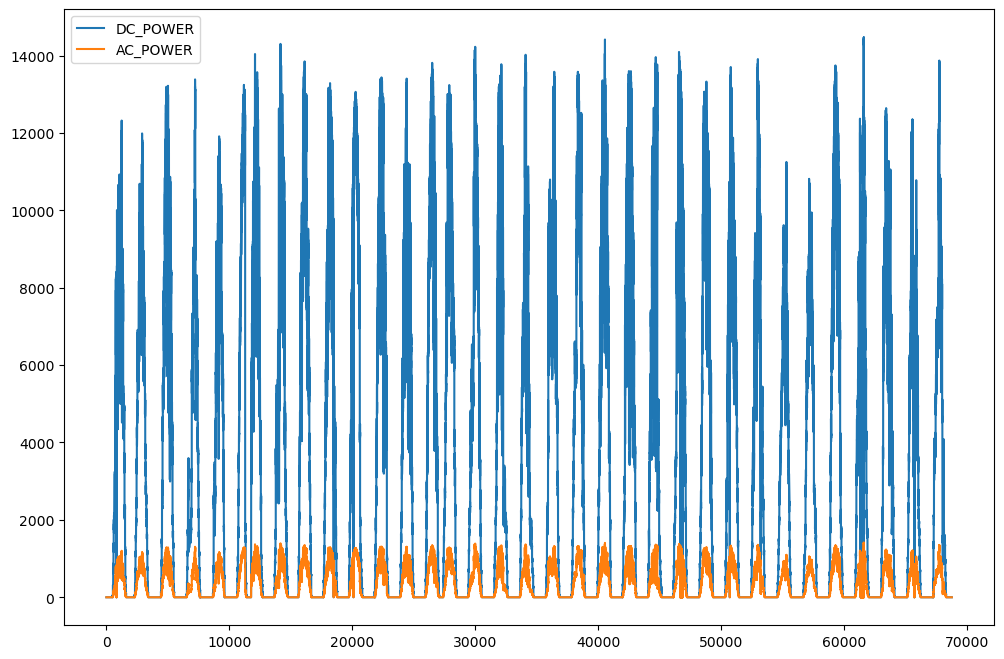

In [15]:
#lo que veo al graficar acompaña lo que veo en los estadisticos de arriba. Y es que hay casi una diferencai del 90%
#entre dc_power y ac_power. Lo que puede estar indicando una ineciciencia.
p1g[['DC_POWER','AC_POWER']].plot(figsize = (12,8))

La diferencia es muy grande.

Primero vamos a comprobar si van en la misma dirección aunque sea a disinta escala (con una correlación), y después vamos a comprobar cual es el ratio medio entre ambas medidas.

In [16]:
#determino la correlacion entre estas dos variables
p1g.DC_POWER.corr(p1g.AC_POWER)
#el resultado de 0.9999 indica una correlacion casi perfecta. Que significa que cuando una sube la otra tambien lo hace. 

0.9999962553331404

In [17]:
#cuantifico la relacion entre dc y ac
(p1g.DC_POWER / p1g.AC_POWER).describe()
#veo que efectivamente la media entre ambos es de 10,23 lo que indica que la produccion de dc es unas 10 veces mayor a la de ac 
#con una desviacion standar de 0,05. Y esa diferencia se mantiene en los cuartiles, min y max.
#queda registrado que aqui hay material para 'tirar del hilo'

count          36827.00
mean              10.23
std                0.05
min                9.38
25%               10.20
50%               10.22
75%               10.25
max               10.47
dtype: float64

Parece que los Inverters están transformando solo el 10% de DC a AC, lo cual a priori es muy bajo.

De todas formas desde la calidad llegamos hasta aquí y seguiremos explorando esto en la parte de análisis y comparándolo con la Planta 2 a ver si pasa lo mismo.

Analizamos la variable categórica, que es el identificador de los inverters.

In [18]:
#ahora paso a analizar la varible que teniamos pendiente que es SOURCE_KEY que es categorica.
#Veo cuantos valores unicos hay. que representan a los inverters
p1g.SOURCE_KEY.nunique()

22

In [19]:
#ahora veo cuantos valores tenemos de cada inverter.
p1g.SOURCE_KEY.value_counts()
#tenemos mas o menos los mismos registros para cada inverter. la diferencia puede ser poruqe algunos estuvieros apagados cierto tiempo

SOURCE_KEY
bvBOhCH3iADSZry    3155
1BY6WEcLGh8j5v7    3154
7JYdWkrLSPkdwr4    3133
VHMLBKoKgIrUVDU    3133
ZnxXDlPa8U1GXgE    3130
ih0vzX44oOqAx2f    3130
z9Y9gH1T5YWrNuG    3126
wCURE6d3bPkepu2    3126
uHbuxQJl8lW7ozc    3125
pkci93gMrogZuBj    3125
iCRJl6heRkivqQ3    3125
rGa61gmuvPhdLxV    3124
sjndEbLyjtCKgGv    3124
McdE0feGgRqW7Ca    3124
zVJPv84UY57bAof    3124
ZoEaEvLYb1n2sOq    3123
1IF53ai7Xc0U56Y    3119
adLQvlD726eNBSB    3119
zBIq5rxdHJRwDNY    3119
WRmjgnKYAwPKWDb    3118
3PZuoBAID5Wc2HD    3118
YxYtjZvoooNbGkE    3104
Name: count, dtype: int64

Conclusiones:

* La planta 1 tiene 22 inverters
* Todos tienen un número similar de medidas aunque no exactamente igual
* Podrían ser paradas por mantenimientos, o simples pérdidas de datos pero lo apuntamos para la fase de análisis

Vamos a analizar las variables DAILY_YIELD, ya que los metadatos nos dicen que la variable TOTAL_YIELD es el total acumulado por inverter, pero en DAILY_YIELD no lo especifica, por lo que no sabemos si es un acumulado por inverter o por planta.

La hipótesis es la siguiente: si es por planta no debería haber diferencias entre el dato de los diferentes inverters en el mismo momento puntual.

Y por consiguiente si vemos que sí hay diferencias entonces es que el dato es por inverter.

Para comprobarlo nos sirve con tomar una muestra de inverters.

In [21]:
#para analizar las variables daily yield y total yield vamos a usar solo 5 source key, para hacerlo mas visible.
seleccion = list(p1g.SOURCE_KEY.unique()[:5])

In [22]:
temp = p1g[p1g.SOURCE_KEY.isin(seleccion)].set_index('DATE_TIME')
temp
#ya con lo que veo me puedo dar cuenta que el daily_yield esta por inverter. Algo quen no me decia la documentacion y me generaba dudas.

,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
DATE_TIME,,,,,,
2020-05-15 00:00:00,p1,1BY6WEcLGh8j5v7,0.00,0.00,0.00,6259559.00
2020-05-15 00:00:00,p1,1IF53ai7Xc0U56Y,0.00,0.00,0.00,6183645.00
2020-05-15 00:00:00,p1,3PZuoBAID5Wc2HD,0.00,0.00,0.00,6987759.00
2020-05-15 00:00:00,p1,7JYdWkrLSPkdwr4,0.00,0.00,0.00,7602960.00
2020-05-15 00:00:00,p1,McdE0feGgRqW7Ca,0.00,0.00,0.00,7158964.00
...,...,...,...,...,...,...
2020-06-17 23:45:00,p1,1BY6WEcLGh8j5v7,0.00,0.00,5521.00,6485319.00
2020-06-17 23:45:00,p1,1IF53ai7Xc0U56Y,0.00,0.00,6034.00,6433566.00
2020-06-17 23:45:00,p1,3PZuoBAID5Wc2HD,0.00,0.00,6052.00,7237425.00


En los datos ya vemos que es diferente, pero vamos a comprobar sobre más datos para que no sea un efecto de esos registros en concreto.

Vamos a verlo gráficamente, y por simplificar vamos a coger solo una muestra de días.

Como tenemos la fecha como index recordamos que podemos usar indexación parcial y slice.

In [23]:
#ahora filtro por fecha este df temporal para luego graficar en sns
temp = temp.loc['2020-06-01':'2020-06-05']
temp

,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
DATE_TIME,,,,,,
2020-06-01 00:00:00,p1,1BY6WEcLGh8j5v7,0.00,0.00,829.00,6377931.00
2020-06-01 00:00:00,p1,1IF53ai7Xc0U56Y,0.00,0.00,0.00,6311432.00
2020-06-01 00:00:00,p1,3PZuoBAID5Wc2HD,0.00,0.00,0.00,7115304.00
2020-06-01 00:00:00,p1,7JYdWkrLSPkdwr4,0.00,0.00,730.38,7727821.00
2020-06-01 00:00:00,p1,McdE0feGgRqW7Ca,0.00,0.00,0.00,7286760.00
...,...,...,...,...,...,...
2020-06-05 23:45:00,p1,1BY6WEcLGh8j5v7,0.00,0.00,7162.00,6412542.00
2020-06-05 23:45:00,p1,1IF53ai7Xc0U56Y,0.00,0.00,0.00,6348557.00
2020-06-05 23:45:00,p1,3PZuoBAID5Wc2HD,0.00,0.00,0.00,7152486.00


C:\Users\manug\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\manug\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


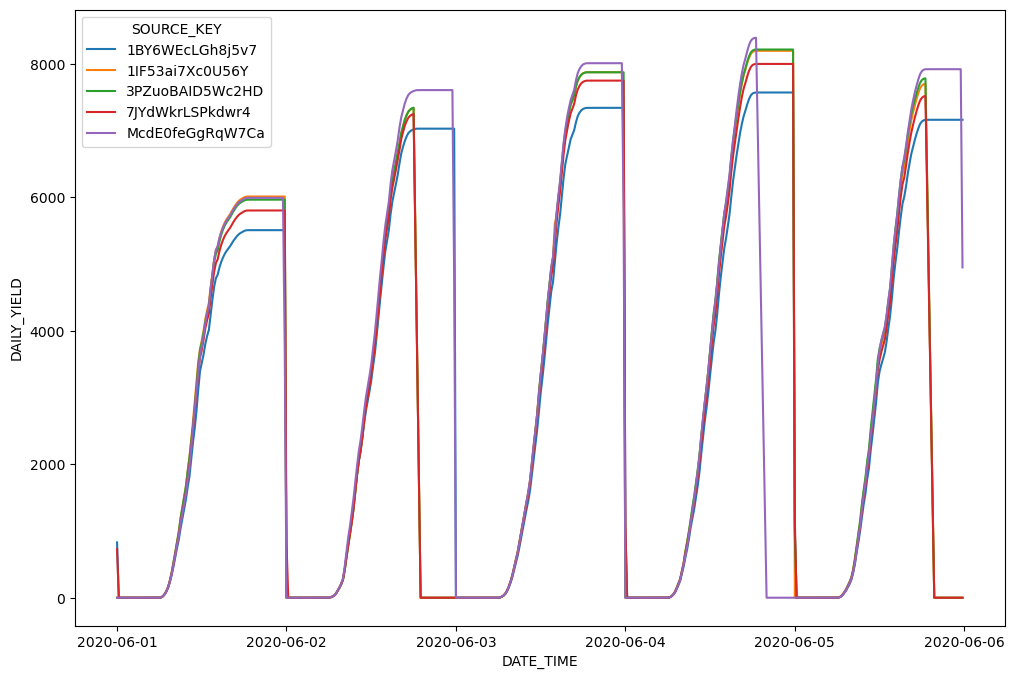

In [24]:
plt.figure(figsize=(12,8))
sns.lineplot(data=temp, x = temp.index, y = 'DAILY_YIELD', hue = 'SOURCE_KEY');

Definitivamente diferentes inverters tienen diferentes datos en el mismo momento temporal, por lo que concluímos que esa variable es **por inverter**

Por último vamos a analizar el período en el que tenemos datos y si el número de mediciones diarias es constante.

<Axes: xlabel='DATE_TIME'>

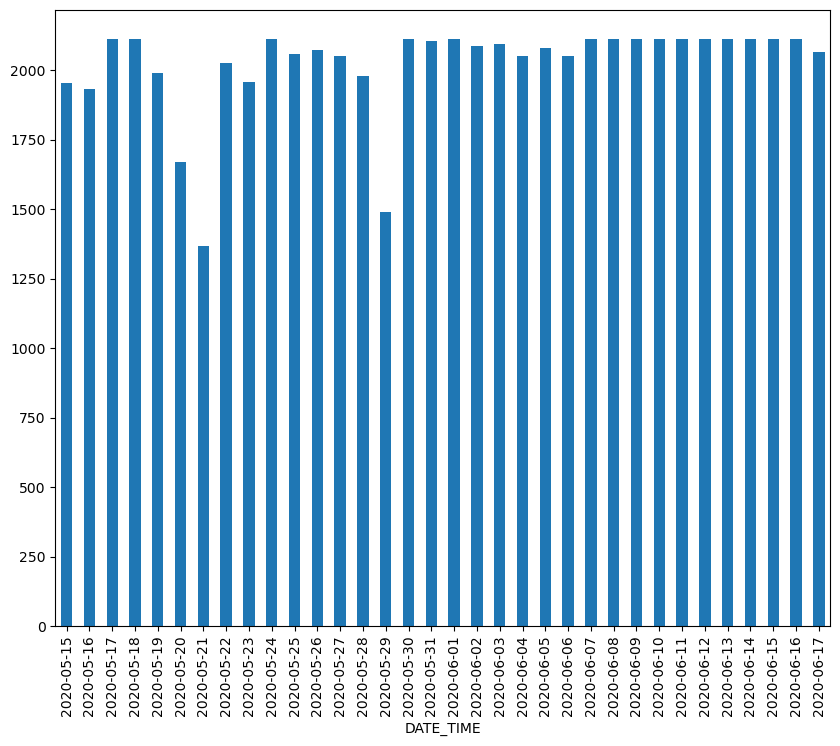

In [25]:
p1g.DATE_TIME.dt.date.value_counts().sort_index().plot.bar(figsize = (10,8))
#vemos que no es regular ya que no son todos iguales, si hay dias que son similares. hay 3 dias que se reunieron menos datos que los demas.
#algo bueno es que no hay dias sin datos.

Conclusiones:

* El período de datos es entre el 15 de Mayo del 2020 y el 17 de Junio de 2020
* Tenemos datos para todos los días, no falta ninguno intermedio
* Pero algunos días como el 21/05 o el 29/05 tienen menos mediciones
* Por lo que no parece 100% regular

### Calidad de datos planta 1 - datos de sensor ambiental

In [26]:
p1w.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DATE_TIME            3182 non-null   object 
 1   PLANT_ID             3182 non-null   int64  
 2   SOURCE_KEY           3182 non-null   object 
 3   AMBIENT_TEMPERATURE  3182 non-null   float64
 4   MODULE_TEMPERATURE   3182 non-null   float64
 5   IRRADIATION          3182 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 149.3+ KB


In [27]:
p1w.DATE_TIME = pd.to_datetime(p1w.DATE_TIME)

In [28]:
p1w.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4135001,HmiyD2TTLFNqkNe,25.18,22.86,0.00
1,2020-05-15 00:15:00,4135001,HmiyD2TTLFNqkNe,25.08,22.76,0.00
2,2020-05-15 00:30:00,4135001,HmiyD2TTLFNqkNe,24.94,22.59,0.00
3,2020-05-15 00:45:00,4135001,HmiyD2TTLFNqkNe,24.85,22.36,0.00
4,2020-05-15 01:00:00,4135001,HmiyD2TTLFNqkNe,24.62,22.17,0.00


In [29]:
p1w['PLANT_ID'] = p1w.PLANT_ID.replace(4135001, 'p1')

In [30]:
p1w.describe().T

,count,mean,min,25%,50%,75%,max,std
DATE_TIME,3182,2020-06-01 05:52:22.080452608,2020-05-15 00:00:00,2020-05-23 22:48:45,2020-06-01 09:52:30,2020-06-09 16:56:15,2020-06-17 23:45:00,NaN
AMBIENT_TEMPERATURE,3182.00,25.53,20.40,22.71,24.61,27.92,35.25,3.35
MODULE_TEMPERATURE,3182.00,31.09,18.14,21.09,24.62,41.31,65.55,12.26
IRRADIATION,3182.00,0.23,0.00,0.00,0.02,0.45,1.22,0.30


In [31]:
p1w.SOURCE_KEY.nunique()

1

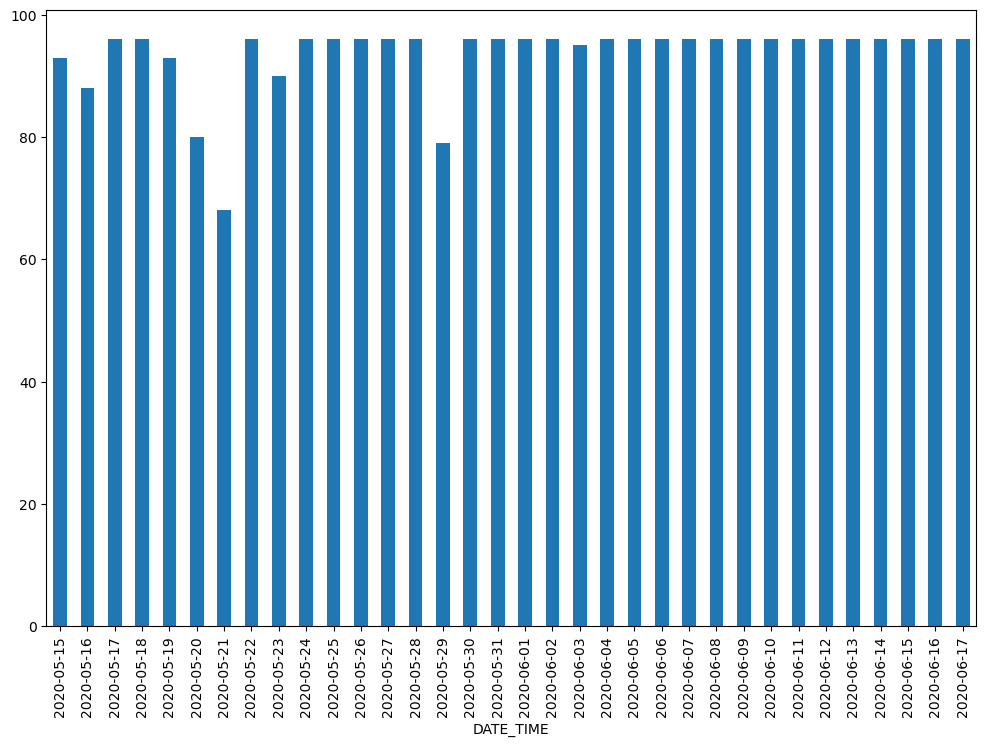

In [32]:
p1w.DATE_TIME.dt.date.value_counts().sort_index().plot.bar(figsize = (12,8));

Conclusiones:

* El período de datos es entre el 15 de Mayo del 2020 y el 17 de Junio de 2020
* Tenemos datos para todos los días, no falta ninguno intermedio
* Pero algunos días como el 21/05 o el 29/05 tienen menos mediciones
* Por lo que no parece 100% regular

### Calidad de planta 2 - datos de generación

In [33]:
p2g.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67698 entries, 0 to 67697
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE_TIME    67698 non-null  object 
 1   PLANT_ID     67698 non-null  int64  
 2   SOURCE_KEY   67698 non-null  object 
 3   DC_POWER     67698 non-null  float64
 4   AC_POWER     67698 non-null  float64
 5   DAILY_YIELD  67698 non-null  float64
 6   TOTAL_YIELD  67698 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 3.6+ MB


In [34]:
p2g.DATE_TIME = pd.to_datetime(p2g.DATE_TIME)

In [35]:
p2g

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,2020-05-15 00:00:00,4136001,4UPUqMRk7TRMgml,0.00,0.00,9425.00,2429011.00
1,2020-05-15 00:00:00,4136001,81aHJ1q11NBPMrL,0.00,0.00,0.00,1215278736.00
2,2020-05-15 00:00:00,4136001,9kRcWv60rDACzjR,0.00,0.00,3075.33,2247719577.00
3,2020-05-15 00:00:00,4136001,Et9kgGMDl729KT4,0.00,0.00,269.93,1704250.00
4,2020-05-15 00:00:00,4136001,IQ2d7wF4YD8zU1Q,0.00,0.00,3177.00,19941526.00
...,...,...,...,...,...,...,...
67693,2020-06-17 23:45:00,4136001,q49J1IKaHRwDQnt,0.00,0.00,4157.00,520758.00
67694,2020-06-17 23:45:00,4136001,rrq4fwE8jgrTyWY,0.00,0.00,3931.00,121131356.00
67695,2020-06-17 23:45:00,4136001,vOuJvMaM2sgwLmb,0.00,0.00,4322.00,2427691.00
67696,2020-06-17 23:45:00,4136001,xMbIugepa2P7lBB,0.00,0.00,4218.00,106896394.00


In [36]:
p2g['PLANT_ID'] = p2g.PLANT_ID.replace(4136001, 'p2')

In [37]:
p2g

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,2020-05-15 00:00:00,p2,4UPUqMRk7TRMgml,0.00,0.00,9425.00,2429011.00
1,2020-05-15 00:00:00,p2,81aHJ1q11NBPMrL,0.00,0.00,0.00,1215278736.00
2,2020-05-15 00:00:00,p2,9kRcWv60rDACzjR,0.00,0.00,3075.33,2247719577.00
3,2020-05-15 00:00:00,p2,Et9kgGMDl729KT4,0.00,0.00,269.93,1704250.00
4,2020-05-15 00:00:00,p2,IQ2d7wF4YD8zU1Q,0.00,0.00,3177.00,19941526.00
...,...,...,...,...,...,...,...
67693,2020-06-17 23:45:00,p2,q49J1IKaHRwDQnt,0.00,0.00,4157.00,520758.00
67694,2020-06-17 23:45:00,p2,rrq4fwE8jgrTyWY,0.00,0.00,3931.00,121131356.00
67695,2020-06-17 23:45:00,p2,vOuJvMaM2sgwLmb,0.00,0.00,4322.00,2427691.00
67696,2020-06-17 23:45:00,p2,xMbIugepa2P7lBB,0.00,0.00,4218.00,106896394.00


In [38]:
p2g.describe().T

,count,mean,min,25%,50%,75%,max,std
DATE_TIME,67698,2020-06-01 10:44:33.650625024,2020-05-15 00:00:00,2020-05-23 21:00:00,2020-06-01 23:00:00,2020-06-09 23:30:00,2020-06-17 23:45:00,NaN
DC_POWER,67698.00,246.70,0.00,0.00,0.00,446.59,1420.93,370.57
AC_POWER,67698.00,241.28,0.00,0.00,0.00,438.22,1385.42,362.11
DAILY_YIELD,67698.00,3294.89,0.00,272.75,2911.00,5534.00,9873.00,2919.45
TOTAL_YIELD,67698.00,658944788.42,0.00,19964944.87,282627587.00,1348495113.00,2247916295.00,729667771.07


In [39]:
(p2g.DC_POWER / p2g.AC_POWER).describe()

count          32036.00
mean               1.02
std                0.01
min                0.99
25%                1.02
50%                1.02
75%                1.03
max                1.10
dtype: float64

In [40]:
p2g.SOURCE_KEY.nunique()

22

Conclusiones:

* La planta 2 tiene 22 inverters
* Todos tienen un número similar de medidas aunque no exactamente igual
* A excepción de 4 que tienen unas 800 medidas menos
* Lo apuntamos para la fase de análisis

<Axes: xlabel='SOURCE_KEY'>

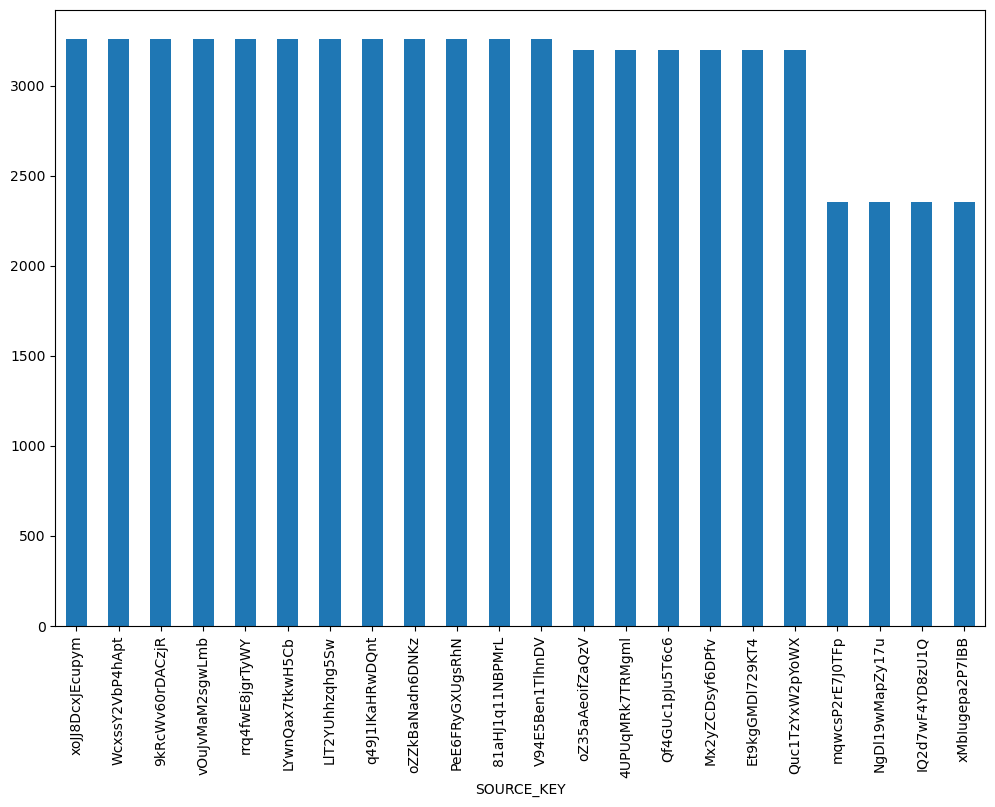

In [41]:
p2g.SOURCE_KEY.value_counts().plot.bar(figsize = (12,8))

In [42]:
inversores_menos_eficientes = list(p2g.SOURCE_KEY.value_counts().sort_values(ascending = True)[0:4].index)
inversores_menos_eficientes

['xMbIugepa2P7lBB', 'NgDl19wMapZy17u', 'mqwcsP2rE7J0TFp', 'IQ2d7wF4YD8zU1Q']

In [43]:
conteo_registros_por_fecha = p2g.DATE_TIME.dt.date.value_counts()

Por último vamos a analizar la fecha.

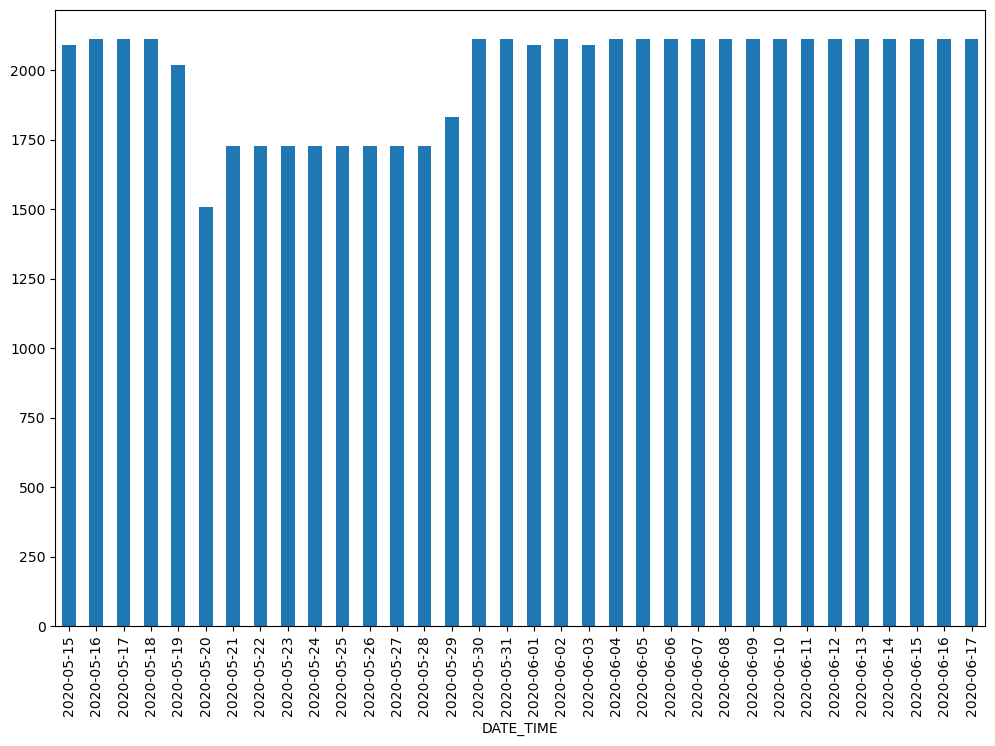

In [44]:
p2g.DATE_TIME.dt.date.value_counts().sort_index().plot.bar(figsize=(12,8));

In [45]:
p2g.DATE_TIME.dt.date.value_counts()

DATE_TIME
2020-06-17    2112
2020-06-04    2112
2020-06-02    2112
2020-05-16    2112
2020-05-31    2112
2020-05-30    2112
2020-06-06    2112
2020-06-07    2112
2020-06-08    2112
2020-06-09    2112
2020-06-10    2112
2020-06-11    2112
2020-06-12    2112
2020-06-13    2112
2020-06-14    2112
2020-06-15    2112
2020-06-16    2112
2020-05-18    2112
2020-05-17    2112
2020-06-05    2112
2020-05-15    2090
2020-06-03    2090
2020-06-01    2090
2020-05-19    2020
2020-05-29    1834
2020-05-28    1728
2020-05-27    1728
2020-05-26    1728
2020-05-25    1728
2020-05-24    1728
2020-05-23    1728
2020-05-22    1728
2020-05-21    1728
2020-05-20    1510
Name: count, dtype: int64

In [46]:
conteo_registros_por_fecha[conteo_registros_por_fecha < 2112].values

array([2090, 2090, 2090, 2020, 1834, 1728, 1728, 1728, 1728, 1728, 1728,
       1728, 1728, 1510], dtype=int64)

Conclusiones:

* El período de datos es entre el 15 de Mayo del 2020 y el 17 de Junio de 2020
* Tenemos datos para todos los días, no falta ninguno intermedio
* Pero algunos días como el 20/05 y varios más tienen menos mediciones
* Por lo que no parece 100% regular

### Calidad de datos planta 2 - datos de sensor ambiental

In [47]:
p2w.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3259 entries, 0 to 3258
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DATE_TIME            3259 non-null   object 
 1   PLANT_ID             3259 non-null   int64  
 2   SOURCE_KEY           3259 non-null   object 
 3   AMBIENT_TEMPERATURE  3259 non-null   float64
 4   MODULE_TEMPERATURE   3259 non-null   float64
 5   IRRADIATION          3259 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 152.9+ KB


In [48]:
p2w.DATE_TIME = pd.to_datetime(p2w.DATE_TIME)

In [49]:
p2w.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4136001,iq8k7ZNt4Mwm3w0,27.00,25.06,0.00
1,2020-05-15 00:15:00,4136001,iq8k7ZNt4Mwm3w0,26.88,24.42,0.00
2,2020-05-15 00:30:00,4136001,iq8k7ZNt4Mwm3w0,26.68,24.43,0.00
3,2020-05-15 00:45:00,4136001,iq8k7ZNt4Mwm3w0,26.50,24.42,0.00
4,2020-05-15 01:00:00,4136001,iq8k7ZNt4Mwm3w0,26.60,25.09,0.00


In [50]:
p2w.PLANT_ID = p2w.PLANT_ID.replace(4136001, 'p2')

In [51]:
p2w.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,p2,iq8k7ZNt4Mwm3w0,27.00,25.06,0.00
1,2020-05-15 00:15:00,p2,iq8k7ZNt4Mwm3w0,26.88,24.42,0.00
2,2020-05-15 00:30:00,p2,iq8k7ZNt4Mwm3w0,26.68,24.43,0.00
3,2020-05-15 00:45:00,p2,iq8k7ZNt4Mwm3w0,26.50,24.42,0.00
4,2020-05-15 01:00:00,p2,iq8k7ZNt4Mwm3w0,26.60,25.09,0.00


In [52]:
p2w.describe().T

,count,mean,min,25%,50%,75%,max,std
DATE_TIME,3259,2020-06-01 00:04:35.053697536,2020-05-15 00:00:00,2020-05-23 12:07:30,2020-06-01 00:00:00,2020-06-09 12:07:30,2020-06-17 23:45:00,NaN
AMBIENT_TEMPERATURE,3259.00,28.07,20.94,24.60,26.98,31.06,39.18,4.06
MODULE_TEMPERATURE,3259.00,32.77,20.27,23.72,27.53,40.48,66.64,11.34
IRRADIATION,3259.00,0.23,0.00,0.00,0.02,0.44,1.10,0.31


In [53]:
p2w.SOURCE_KEY.nunique()

1

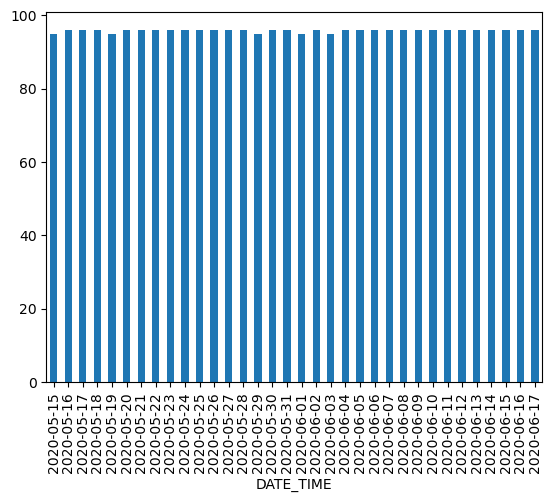

In [54]:
p2w.DATE_TIME.dt.date.value_counts().sort_index().plot.bar();

Conclusiones:

* El período de datos es entre el 15 de Mayo del 2020 y el 17 de Junio de 2020
* Tenemos datos para todos los días, no falta ninguno intermedio
* Pero algunos días como el 15/05 u otros tienen menos mediciones, aunque faltan mucho menos que en los otros datasets
* Pero no parece 100% regular

### Temas pendientes de la calidad de datos para analizar posteriormente

* En la planta 1 parece que los Inverters están transformando solo el 10% de DC a AC, lo cual a priori es muy bajo.
* En la planta 2 el ratio es mucho más cercano a 1.
* Los intervalos de medida no son 100% regulares. Hay días con menos medidas, y hay también diferencias por inverters.

## CREACIÓN DEL DATAMART ANALITICO

In [55]:
#lo que hago es apilar ya que entre p1g y p2g comparten las mismas variables. uso concat
gener = pd.concat([p1g, p2g], axis = 'index')

In [56]:
gener.columns = ['fecha', 'planta','inverter_id', 'kw_dc', 'kw_ac', 'kw_dia', 'kw_total']

In [57]:
gener

,fecha,planta,inverter_id,kw_dc,kw_ac,kw_dia,kw_total
0,2020-05-15 00:00:00,p1,1BY6WEcLGh8j5v7,0.00,0.00,0.00,6259559.00
1,2020-05-15 00:00:00,p1,1IF53ai7Xc0U56Y,0.00,0.00,0.00,6183645.00
2,2020-05-15 00:00:00,p1,3PZuoBAID5Wc2HD,0.00,0.00,0.00,6987759.00
3,2020-05-15 00:00:00,p1,7JYdWkrLSPkdwr4,0.00,0.00,0.00,7602960.00
4,2020-05-15 00:00:00,p1,McdE0feGgRqW7Ca,0.00,0.00,0.00,7158964.00
...,...,...,...,...,...,...,...
67693,2020-06-17 23:45:00,p2,q49J1IKaHRwDQnt,0.00,0.00,4157.00,520758.00
67694,2020-06-17 23:45:00,p2,rrq4fwE8jgrTyWY,0.00,0.00,3931.00,121131356.00
67695,2020-06-17 23:45:00,p2,vOuJvMaM2sgwLmb,0.00,0.00,4322.00,2427691.00
67696,2020-06-17 23:45:00,p2,xMbIugepa2P7lBB,0.00,0.00,4218.00,106896394.00


Ahora que tenemos las 2 plantas unidas vamos a hacer lo que se llama un análisis de coherencia, dado que según la documentación kw_dia y kw_total están directamente relacionados con kw_dc y kw_ac.

Vamos a intentar replicar los datos de kw_dia y kw_total.

In [58]:
gener2 = gener.copy()

In [59]:
gener2['date'] = gener2.fecha.dt.date
gener2

,fecha,planta,inverter_id,kw_dc,kw_ac,kw_dia,kw_total,date
0,2020-05-15 00:00:00,p1,1BY6WEcLGh8j5v7,0.00,0.00,0.00,6259559.00,2020-05-15
1,2020-05-15 00:00:00,p1,1IF53ai7Xc0U56Y,0.00,0.00,0.00,6183645.00,2020-05-15
2,2020-05-15 00:00:00,p1,3PZuoBAID5Wc2HD,0.00,0.00,0.00,6987759.00,2020-05-15
3,2020-05-15 00:00:00,p1,7JYdWkrLSPkdwr4,0.00,0.00,0.00,7602960.00,2020-05-15
4,2020-05-15 00:00:00,p1,McdE0feGgRqW7Ca,0.00,0.00,0.00,7158964.00,2020-05-15
...,...,...,...,...,...,...,...,...
67693,2020-06-17 23:45:00,p2,q49J1IKaHRwDQnt,0.00,0.00,4157.00,520758.00,2020-06-17
67694,2020-06-17 23:45:00,p2,rrq4fwE8jgrTyWY,0.00,0.00,3931.00,121131356.00,2020-06-17
67695,2020-06-17 23:45:00,p2,vOuJvMaM2sgwLmb,0.00,0.00,4322.00,2427691.00,2020-06-17
67696,2020-06-17 23:45:00,p2,xMbIugepa2P7lBB,0.00,0.00,4218.00,106896394.00,2020-06-17


In [60]:
#ahora tengo agrupado por planta, por fecha y por inverter.
gener2 = gener2.groupby(['planta', 'date', 'inverter_id']).agg({'kw_dc':'sum', 'kw_ac':'sum', 'kw_dia':'max', 'kw_total':'max'}).reset_index()
gener2

,planta,date,inverter_id,kw_dc,kw_ac,kw_dia,kw_total
0,p1,2020-05-15,1BY6WEcLGh8j5v7,235340.70,23046.55,5754.00,6265313.00
1,p1,2020-05-15,1IF53ai7Xc0U56Y,258911.11,25343.29,6357.00,6190002.00
2,p1,2020-05-15,3PZuoBAID5Wc2HD,254766.05,24937.70,6274.00,6994033.00
3,p1,2020-05-15,7JYdWkrLSPkdwr4,250608.34,24533.91,6116.00,7609076.00
4,p1,2020-05-15,McdE0feGgRqW7Ca,264030.98,25840.63,6471.00,7165435.00
...,...,...,...,...,...,...,...
1459,p2,2020-06-17,q49J1IKaHRwDQnt,17001.51,16655.15,4157.00,520758.00
1460,p2,2020-06-17,rrq4fwE8jgrTyWY,16073.93,15748.92,3931.00,121131356.00
1461,p2,2020-06-17,vOuJvMaM2sgwLmb,17710.00,17345.44,4322.00,2427691.00
1462,p2,2020-06-17,xMbIugepa2P7lBB,17211.23,16860.38,5502.00,106896394.00


In [61]:
#ordeno la salida.
gener2 = gener2.sort_values(['planta', 'inverter_id', 'date'])
gener2


,planta,date,inverter_id,kw_dc,kw_ac,kw_dia,kw_total
0,p1,2020-05-15,1BY6WEcLGh8j5v7,235340.70,23046.55,5754.00,6265313.00
22,p1,2020-05-16,1BY6WEcLGh8j5v7,256629.88,25124.49,6292.00,6271605.00
44,p1,2020-05-17,1BY6WEcLGh8j5v7,288039.82,28172.85,7045.00,6278650.00
66,p1,2020-05-18,1BY6WEcLGh8j5v7,204030.30,19970.51,4998.00,6283648.00
88,p1,2020-05-19,1BY6WEcLGh8j5v7,232277.27,22741.18,6449.00,6290097.00
...,...,...,...,...,...,...,...
1375,p2,2020-06-13,xoJJ8DcxJEcupym,27443.74,26840.58,6632.00,209312200.00
1397,p2,2020-06-14,xoJJ8DcxJEcupym,30768.78,30088.97,7268.00,209319687.00
1419,p2,2020-06-15,xoJJ8DcxJEcupym,25597.24,25049.49,7412.67,209325949.00
1441,p2,2020-06-16,xoJJ8DcxJEcupym,22335.69,21870.63,6203.20,209331425.00


In [62]:
#veo que la variable kw_dia no esta actuando como un acumulado ya que no coincide con kw_dc ni kw_dc. Tampoco se como esta sumando kw_total. Para 
#abordar el analisis de este ultimo, hago un lag (hago una columna que este un registro mas abajo para poder restarla.)

#hago el groupby para porque son las variables que quiero que agrupe, lo que significa que son las que quiero que cuando cambien se resetee.
#es decir que va a llegar a todos los registros del inverter 1 y va a meter otro NaN cuando arranque el 2. Y lo mismo con la planta
gener2['lag1'] = gener2.groupby(['planta', 'inverter_id']).kw_total.shift(1)
gener2['incremento'] = gener2.kw_total - gener2.lag1
gener2
#podemos ver que kw_total va sumando lo de kw_dia

,planta,date,inverter_id,kw_dc,kw_ac,kw_dia,kw_total,lag1,incremento
0,p1,2020-05-15,1BY6WEcLGh8j5v7,235340.70,23046.55,5754.00,6265313.00,NaN,NaN
22,p1,2020-05-16,1BY6WEcLGh8j5v7,256629.88,25124.49,6292.00,6271605.00,6265313.00,6292.00
44,p1,2020-05-17,1BY6WEcLGh8j5v7,288039.82,28172.85,7045.00,6278650.00,6271605.00,7045.00
66,p1,2020-05-18,1BY6WEcLGh8j5v7,204030.30,19970.51,4998.00,6283648.00,6278650.00,4998.00
88,p1,2020-05-19,1BY6WEcLGh8j5v7,232277.27,22741.18,6449.00,6290097.00,6283648.00,6449.00
...,...,...,...,...,...,...,...,...,...
1375,p2,2020-06-13,xoJJ8DcxJEcupym,27443.74,26840.58,6632.00,209312200.00,209305520.00,6680.00
1397,p2,2020-06-14,xoJJ8DcxJEcupym,30768.78,30088.97,7268.00,209319687.00,209312200.00,7487.00
1419,p2,2020-06-15,xoJJ8DcxJEcupym,25597.24,25049.49,7412.67,209325949.00,209319687.00,6262.00
1441,p2,2020-06-16,xoJJ8DcxJEcupym,22335.69,21870.63,6203.20,209331425.00,209325949.00,5476.00


In [63]:
#aca me doy cuenta de que la cantidad de valores de incremento no coincide al 100% con los de kw_dia. Pero el profesor no lo vio
#por lo que no voy a hacer nada.
#Se concluye que hay asociacion entre kw_dia y kw_totol. Pero no de estas con kw_dc y kW_ac, que a su vez se relacionan entre sí.
(gener2.kw_dia == gener2.incremento).value_counts()

True     1169
False     295
Name: count, dtype: int64

In [64]:
gener2.incremento.isna().sum()

44

# Apilo p1w y p2w

In [65]:
temper = pd.concat([p1w, p2w])
temper

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,p1,HmiyD2TTLFNqkNe,25.18,22.86,0.00
1,2020-05-15 00:15:00,p1,HmiyD2TTLFNqkNe,25.08,22.76,0.00
2,2020-05-15 00:30:00,p1,HmiyD2TTLFNqkNe,24.94,22.59,0.00
3,2020-05-15 00:45:00,p1,HmiyD2TTLFNqkNe,24.85,22.36,0.00
4,2020-05-15 01:00:00,p1,HmiyD2TTLFNqkNe,24.62,22.17,0.00
...,...,...,...,...,...,...
3254,2020-06-17 22:45:00,p2,iq8k7ZNt4Mwm3w0,23.51,22.86,0.00
3255,2020-06-17 23:00:00,p2,iq8k7ZNt4Mwm3w0,23.48,22.74,0.00
3256,2020-06-17 23:15:00,p2,iq8k7ZNt4Mwm3w0,23.35,22.49,0.00
3257,2020-06-17 23:30:00,p2,iq8k7ZNt4Mwm3w0,23.29,22.37,0.00


In [66]:
temper.columns = ['fecha', 'planta', 'sensor_id', 't_ambiente', 't_modulo', 'irradiacion']
temper

,fecha,planta,sensor_id,t_ambiente,t_modulo,irradiacion
0,2020-05-15 00:00:00,p1,HmiyD2TTLFNqkNe,25.18,22.86,0.00
1,2020-05-15 00:15:00,p1,HmiyD2TTLFNqkNe,25.08,22.76,0.00
2,2020-05-15 00:30:00,p1,HmiyD2TTLFNqkNe,24.94,22.59,0.00
3,2020-05-15 00:45:00,p1,HmiyD2TTLFNqkNe,24.85,22.36,0.00
4,2020-05-15 01:00:00,p1,HmiyD2TTLFNqkNe,24.62,22.17,0.00
...,...,...,...,...,...,...
3254,2020-06-17 22:45:00,p2,iq8k7ZNt4Mwm3w0,23.51,22.86,0.00
3255,2020-06-17 23:00:00,p2,iq8k7ZNt4Mwm3w0,23.48,22.74,0.00
3256,2020-06-17 23:15:00,p2,iq8k7ZNt4Mwm3w0,23.35,22.49,0.00
3257,2020-06-17 23:30:00,p2,iq8k7ZNt4Mwm3w0,23.29,22.37,0.00


# Uno por campo clave gener y temper

In [73]:
df = pd.merge(left = gener, right = temper, how = 'left', on = ['fecha', 'planta'])

In [75]:
df.isna().sum()
#veo que tengo datos nulos.

fecha          0
planta         0
inverter_id    0
kw_dc          0
kw_ac          0
kw_dia         0
kw_total       0
sensor_id      4
t_ambiente     4
t_modulo       4
irradiacion    4
dtype: int64

In [76]:
df[df.sensor_id.isna()]

,fecha,planta,inverter_id,kw_dc,kw_ac,kw_dia,kw_total,sensor_id,t_ambiente,t_modulo,irradiacion
38544,2020-06-03 14:00:00,p1,1IF53ai7Xc0U56Y,7003.00,685.80,5601.00,6330385.00,NaN,NaN,NaN,NaN
38545,2020-06-03 14:00:00,p1,adLQvlD726eNBSB,7204.00,705.40,5685.00,6419961.00,NaN,NaN,NaN,NaN
38546,2020-06-03 14:00:00,p1,wCURE6d3bPkepu2,7545.00,738.70,5579.00,6928448.00,NaN,NaN,NaN,NaN
38547,2020-06-03 14:00:00,p1,z9Y9gH1T5YWrNuG,7946.00,777.80,5541.00,7152815.00,NaN,NaN,NaN,NaN


In [78]:
#estos son los valores mas cercanos, con los que podria imputar los nulos. Pero al final voy a terminar eliminandolos
temper[temper.fecha.between('2020-06-03 13:30:00','2020-06-03 14:30:00')]

,fecha,planta,sensor_id,t_ambiente,t_modulo,irradiacion
1797,2020-06-03 13:30:00,p1,HmiyD2TTLFNqkNe,28.56,48.78,0.75
1798,2020-06-03 13:45:00,p1,HmiyD2TTLFNqkNe,27.86,46.63,0.62
1799,2020-06-03 14:15:00,p1,HmiyD2TTLFNqkNe,28.36,50.63,0.72
1800,2020-06-03 14:30:00,p1,HmiyD2TTLFNqkNe,28.31,47.38,0.67
1874,2020-06-03 13:30:00,p2,iq8k7ZNt4Mwm3w0,28.60,37.68,0.41
1875,2020-06-03 13:45:00,p2,iq8k7ZNt4Mwm3w0,28.75,36.35,0.35
1876,2020-06-03 14:15:00,p2,iq8k7ZNt4Mwm3w0,30.45,45.63,0.76
1877,2020-06-03 14:30:00,p2,iq8k7ZNt4Mwm3w0,29.64,40.40,0.44


In [80]:
#elimino los nulos.
df.dropna(inplace = True)
df.isna().sum()

fecha          0
planta         0
inverter_id    0
kw_dc          0
kw_ac          0
kw_dia         0
kw_total       0
sensor_id      0
t_ambiente     0
t_modulo       0
irradiacion    0
dtype: int64

In [81]:
#seteo la fecha como index
df.set_index('fecha', inplace = True)
df

,planta,inverter_id,kw_dc,kw_ac,kw_dia,kw_total,sensor_id,t_ambiente,t_modulo,irradiacion
fecha,,,,,,,,,,
2020-05-15 00:00:00,p1,1BY6WEcLGh8j5v7,0.00,0.00,0.00,6259559.00,HmiyD2TTLFNqkNe,25.18,22.86,0.00
2020-05-15 00:00:00,p1,1IF53ai7Xc0U56Y,0.00,0.00,0.00,6183645.00,HmiyD2TTLFNqkNe,25.18,22.86,0.00
2020-05-15 00:00:00,p1,3PZuoBAID5Wc2HD,0.00,0.00,0.00,6987759.00,HmiyD2TTLFNqkNe,25.18,22.86,0.00
2020-05-15 00:00:00,p1,7JYdWkrLSPkdwr4,0.00,0.00,0.00,7602960.00,HmiyD2TTLFNqkNe,25.18,22.86,0.00
2020-05-15 00:00:00,p1,McdE0feGgRqW7Ca,0.00,0.00,0.00,7158964.00,HmiyD2TTLFNqkNe,25.18,22.86,0.00
...,...,...,...,...,...,...,...,...,...,...
2020-06-17 23:45:00,p2,q49J1IKaHRwDQnt,0.00,0.00,4157.00,520758.00,iq8k7ZNt4Mwm3w0,23.20,22.54,0.00
2020-06-17 23:45:00,p2,rrq4fwE8jgrTyWY,0.00,0.00,3931.00,121131356.00,iq8k7ZNt4Mwm3w0,23.20,22.54,0.00
2020-06-17 23:45:00,p2,vOuJvMaM2sgwLmb,0.00,0.00,4322.00,2427691.00,iq8k7ZNt4Mwm3w0,23.20,22.54,0.00


## GUARDAMOS EL DATAMART

In [82]:
df.to_pickle('../Datos/df.pickle')

In [83]:
#lo importo a modo de prueba
df2 = pd.read_pickle('../Datos/df.pickle')
df2

,planta,inverter_id,kw_dc,kw_ac,kw_dia,kw_total,sensor_id,t_ambiente,t_modulo,irradiacion
fecha,,,,,,,,,,
2020-05-15 00:00:00,p1,1BY6WEcLGh8j5v7,0.00,0.00,0.00,6259559.00,HmiyD2TTLFNqkNe,25.18,22.86,0.00
2020-05-15 00:00:00,p1,1IF53ai7Xc0U56Y,0.00,0.00,0.00,6183645.00,HmiyD2TTLFNqkNe,25.18,22.86,0.00
2020-05-15 00:00:00,p1,3PZuoBAID5Wc2HD,0.00,0.00,0.00,6987759.00,HmiyD2TTLFNqkNe,25.18,22.86,0.00
2020-05-15 00:00:00,p1,7JYdWkrLSPkdwr4,0.00,0.00,0.00,7602960.00,HmiyD2TTLFNqkNe,25.18,22.86,0.00
2020-05-15 00:00:00,p1,McdE0feGgRqW7Ca,0.00,0.00,0.00,7158964.00,HmiyD2TTLFNqkNe,25.18,22.86,0.00
...,...,...,...,...,...,...,...,...,...,...
2020-06-17 23:45:00,p2,q49J1IKaHRwDQnt,0.00,0.00,4157.00,520758.00,iq8k7ZNt4Mwm3w0,23.20,22.54,0.00
2020-06-17 23:45:00,p2,rrq4fwE8jgrTyWY,0.00,0.00,3931.00,121131356.00,iq8k7ZNt4Mwm3w0,23.20,22.54,0.00
2020-06-17 23:45:00,p2,vOuJvMaM2sgwLmb,0.00,0.00,4322.00,2427691.00,iq8k7ZNt4Mwm3w0,23.20,22.54,0.00
